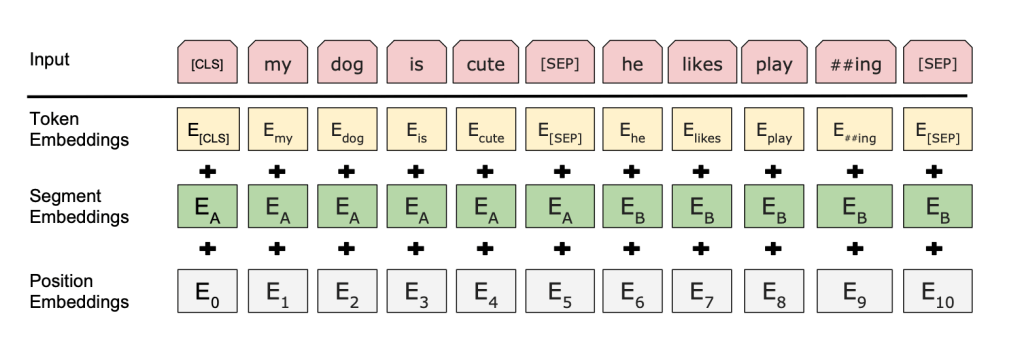

In [10]:
from IPython.display import Image
Image(filename='./samples/BERT-embeddings-2.png') 

## summary

- bert input embedding：一种查表操作（lookup table）
    - 查表
        - token embeddings：30522*768
        - segment embeddings：2*768
        - position embeddings: 512*768
    - 后处理
        - layer norm
        - dropout

In [2]:
from transformers import BertTokenizer, BertModel
import torch 
from torch import nn

/home/agent_mxz/miniconda3/envs/bert/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained("/home/agent_mxz/disk1/bert_model/bert-base-uncased")
model = BertModel.from_pretrained("/home/agent_mxz/disk1/bert_model/bert-base-uncased")

In [126]:
test_sent = 'this is a test sentence Both examples iterate over each column of the tensor and print the contents of each column along with its index. You can adjust the tensor creation and contents based on your specific use case.The GPT (Generative Pre-trained Transformer) series of models, including GPT-2 and GPT-3, are prominent examples of causal LMs. These models use transformer-based architectures and generate text by predicting the next token given the entire history of tokens generated so far. Causal LMs are commonly used for tasks such as text generation, dialogue systems, and language translation.In summary, a causal LM operates by predicting text sequentially based on the preceding context, making it well-suited for tasks that require generating text in a fluent and coherent manner. A "causal LM" refers to a type of language model that generates text in a causal (or autoregressive) manner, meaning it predicts the next token in a sequence based only on the tokens that precede it. This term is often used interchangeably with "autoregressive LM. in a causal LM:Each token generated depends only on the tokens that came before it in the sequence.The model predicts the next token based on the entire preceding context.This approach ensures that the model generates text in a coherent and contextually consistent manner, maintaining the flow of language based on what has been generated so far. Prefix LMs are useful for tasks like text completion, where the goal is to generate coherent and contextually relevant text given an initial prompt or prefix. These models are often used in natural language generation applications such as chatbots, dialogue systems, and text summarization tools. I dont have a gender or personal identity like humans do. Im here to help answer your questions and provide information to the best of my ability! If theres anything else youd like to know or discuss, feel free to ask.On Monday, Manhattan prosecutors began trying to persuade a jury that Donald Trump is guilty of 34 felonies in his hush money case. On Tuesday, they’ll try to persuade the judge that he deserves a more immediate penalty: They want him held in contempt.The prosecutors say Trump has repeatedly violated a gag order that prohibits him from attacking witnesses, jurors and others involved in the case. Justice Juan Merchan has scheduled a Tuesday morning hearing, outside the presence of the jury, to consider the prosecutors’ arguments.If Merchan agrees that Trump has defied the gag order, he’ll then face the thorny question of what to do about it. His options range from a sternly worded warning to a modest fine to a short stint in jail.Several former prosecutors said they expect Merchan to be lenient. But they also noted that the situation is fluid, unpredictable, and — it goes without saying — unprecedented“Judge Merchan is going to do everything possible to give him as much leeway as possible to cure the situation and be a better defendant,” said Diana Florence, a former Manhattan prosecutor.But Trump has shown little willingness to curb his public rhetoric, prosecutors say. On April 15, the first day of the trial, prosecutors cited three alleged violations of the gag order, including an April 13 post on Truth Social in which Trump called Michael Cohen, a star witness for the prosecution, a “disgraced attorney and felon.”Then, on April 18, prosecutors accused Trump of violating the gag order seven more times in a three-day span. The most egregious example, they said, was a Truth Social post in which Trump quoted a Fox News host as saying, “They are catching undercover Liberal Activists lying to the Judge in order to get on the Trump Jury.”These statements, prosecutors say, are “willful violations” of the judge’s gag order and risk undermining “the integrity of the ongoing trial.” They asked the judge to fine Trump $1,000 per violation. In their initial motion for contempt after the first three alleged violations, they also urged the judge to warn Trump that “future violations” could be punished “not only with additional fines, but also with a term of incarceration of up to thirty days.”Trump’s team, meanwhile, defended the lawfulness of the posts. Trump lawyer Emil Bove argued, for instance, that Trump’s posts about Cohen came in response to commentary the consigliere-turned-state’s-witness made in the media about the former president.The gag order doesn’t include an exception for such rebuttals. But the judge could add one, according to former prosecutor and New York Law School professor Rebecca Roiphe.There’s something to be said for the fact that the whole point of the gag order is to ensure the integrity of the proceedings, and if the defendant would suffer from being tongue-tied because there are others in the media talking about this, then that’s not a completely irrelevant point to make,” she said.Trump has repeatedly tested Merchan’s patience in recent weeks. The judge initially issued the gag order on March 26. Then, on April 1, after Trump'

In [127]:
input = tokenizer(test_sent, return_tensors='pt')

Token indices sequence length is longer than the specified maximum sequence length for this model (1062 > 512). Running this sequence through the model will result in indexing errors


In [128]:
input

{'input_ids': tensor([[  101,  2023,  2003,  1037,  3231,  6251,  2119,  4973,  2009, 22139,
          2058,  2169,  5930,  1997,  1996, 23435,  1998,  6140,  1996,  8417,
          1997,  2169,  5930,  2247,  2007,  2049,  5950,  1012,  2017,  2064,
         14171,  1996, 23435,  4325,  1998,  8417,  2241,  2006,  2115,  3563,
          2224,  2553,  1012,  1996, 14246,  2102,  1006, 11416,  6024,  3653,
          1011,  4738, 10938,  2121,  1007,  2186,  1997,  4275,  1010,  2164,
         14246,  2102,  1011,  1016,  1998, 14246,  2102,  1011,  1017,  1010,
          2024,  4069,  4973,  1997, 28102,  1048,  5244,  1012,  2122,  4275,
          2224, 10938,  2121,  1011,  2241,  4294,  2015,  1998,  9699,  3793,
          2011, 29458,  1996,  2279, 19204,  2445,  1996,  2972,  2381,  1997,
         19204,  2015,  7013,  2061,  2521,  1012, 28102,  1048,  5244,  2024,
          4141,  2109,  2005,  8518,  2107,  2004,  3793,  4245,  1010,  7982,
          3001,  1010,  1998,  2653,  

In [129]:
input_ids = input['input_ids']
token_type_ids = input['token_type_ids']

In [130]:
input_ids.shape

torch.Size([1, 1062])

In [131]:
pos_ids = torch.arange(input_ids.shape[1])

In [132]:
pos_ids

tensor([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,
          24,   25,   26,   27,   28,   29,   30,   31,   32,   33,   34,   35,
          36,   37,   38,   39,   40,   41,   42,   43,   44,   45,   46,   47,
          48,   49,   50,   51,   52,   53,   54,   55,   56,   57,   58,   59,
          60,   61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
          72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,   83,
          84,   85,   86,   87,   88,   89,   90,   91,   92,   93,   94,   95,
          96,   97,   98,   99,  100,  101,  102,  103,  104,  105,  106,  107,
         108,  109,  110,  111,  112,  113,  114,  115,  116,  117,  118,  119,
         120,  121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
         132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  146,  147,  148,  1

## 1. token embedding

In [133]:
token_embed = model.embeddings.word_embeddings(input_ids)

In [134]:
token_embed.shape

torch.Size([1, 1062, 768])

In [135]:
torch.set_printoptions(threshold=float('inf'))
sum(token_embed[0][5]>0.00001)

tensor(248)

## 2. segment type embedding

In [136]:
seg_embed = model.embeddings.token_type_embeddings(token_type_ids)

In [137]:
seg_embed.shape

torch.Size([1, 1062, 768])

In [138]:
seg_embed[0][1]>0.1

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

## 3. pos embedding

In [141]:
pos_embed.shape

torch.Size([512, 768])

In [142]:
len(pos_embed)

512

In [143]:
import numpy as np
true_lt = []
for k in range(len(pos_embed)):
    true_lt += [i for i in np.where((pos_embed[k]>0.1) == True)[0]]
len(set(true_lt))

36

## 4. input embedding

In [34]:
input_embed = token_embed + seg_embed + pos_embed.unsqueeze(0)

In [35]:
input_embed

tensor([[[ 0.0316, -0.0411, -0.0564,  ...,  0.0021,  0.0044,  0.0219],
         [-0.0489,  0.0285, -0.0204,  ...,  0.0190,  0.0265, -0.0045],
         [-0.0469, -0.0156, -0.0336,  ...,  0.0117,  0.0135,  0.0109],
         ...,
         [ 0.0185, -0.0608, -0.0331,  ...,  0.0040, -0.0071, -0.1213],
         [ 0.0294, -0.0017, -0.0217,  ..., -0.0004, -0.0913, -0.0948],
         [-0.0077, -0.0166, -0.0123,  ..., -0.0310,  0.0124, -0.0064]]],
       grad_fn=<AddBackward0>)

## 5. 后处理

In [39]:
embed = model.embeddings.LayerNorm(input_embed)

In [40]:
embed = model.embeddings.dropout(embed)

In [41]:
embed

tensor([[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
         [-0.6485,  0.6739, -0.0932,  ...,  0.4475,  0.6696,  0.1820],
         [-0.6270, -0.0633, -0.3143,  ...,  0.3427,  0.4636,  0.4594],
         ...,
         [ 0.6010, -0.6970, -0.2001,  ...,  0.2960,  0.2060, -1.7181],
         [ 0.8323,  0.2878,  0.0021,  ...,  0.2628, -1.1310, -1.2708],
         [-0.1481, -0.2948, -0.1690,  ..., -0.5009,  0.2544, -0.0700]]],
       grad_fn=<NativeLayerNormBackward0>)